# RNN에 대한 기본 개념을 이해해보자
- RNN은 이전 데이터가 다음 데이터에 영향을 주는 경우 적합한 학습이 될 수 있다
- Keras의 SimpleRNN을 사용해보자

# char 단위로 학습하기
- 4개의 글자(char)가 들어가면 다음 글자(char)를 맞추는 모델링을 해보자
- hello, apple, happy, drink, house
- 단어사전(14개) : h, e, l, o, a, p, y, d, r, i, n, k, u, s

In [1]:
import numpy as np

In [17]:
# X : 5개의 단어 데이터의 앞에서부터 4개 글자(char)
# 원-핫인코딩의 방법으로 글자를 숫자로 표현
# ex) 'hell'의 'h' 는 [1,0,0,0,0,0,0,0,0,0,0,0,0,0] 로 표현
# ex) 'hell'이 모델에 입력되면 'o'가 출력되는 학습
#     'hell' -> X , o -> y
X = np.array([
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]], # h, e, l, l
    [[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]], # a, p, p, l
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0]], # h, a, p, p
    [[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,0]], # d, r, i, n
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1]] # h, o, u, s
])

In [9]:
# y : o, e, y, k, e
# 정답 글자들을 한 번 더 묶어줌 -> 2차원
y = np.array([
             [0,0,0,1,0,0,0,0,0,0,0,0,0,0], # 'hell' -> 'o'
             [0,1,0,0,0,0,0,0,0,0,0,0,0,0], # 'appl' -> 'e'
             [0,0,0,0,0,0,1,0,0,0,0,0,0,0], # 'happ' -> 'y'
             [0,0,0,0,0,0,0,0,0,0,0,1,0,0], # 'drin' -> 'k'
             [0,1,0,0,0,0,0,0,0,0,0,0,0,0]  # 'hous' -> 'e'
            ])

In [21]:
# (개수, time step(순환 횟수), 특성 수)
print(X.shape, y.shape)

(5, 4, 14) (5, 14)


# 모델링

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, SimpleRNN, Dense
# SimpleRNN : Keras 제공 기본 RNN 레이어

In [23]:
# 1. 모델 구조 정의
model = Sequential()

model.add(InputLayer(shape=(4, 14))) # 입력층 (데이터 개수가 아닌 나머지 입력 shape) ... X의 숫자 = w의 숫자 .. 모델이 찾아야하는 w(가중치)의 갯수를 알게 됨
model.add(SimpleRNN(units=16, activation='tanh')) # 중간층
# 활성화 함수의 기본 값 : tanh
model.add(Dense(14, activation='softmax')) # 출력층 # 14개(단어사전)의 char 중 하나를 뽑아야 함 -> 다중분류

In [24]:
# 2. 학습 방법 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2000 - loss: 2.8943
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2000 - loss: 2.8687
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2000 - loss: 2.8433
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2000 - loss: 2.8180
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2000 - loss: 2.7930
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2000 - loss: 2.7681
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2000 - loss: 2.7434
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2000 - loss: 2.7189
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2000 - loss: 2.6945
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2000 - loss: 2.6704
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2000 - loss: 2.6463
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0

In [32]:
# 예측
# 모델의 입력 형태인 3차원으로 reshape (개수, 순환 횟수, 특성 수)
X_test = X[0].reshape(1,4,14)
X_test.shape

(1, 4, 14)

In [34]:
model.predict(X_test).argmax() # 3번 인덱스 = o의 확률이 가장 높음

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


np.int64(3)

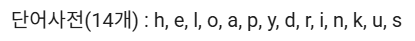

In [37]:
model.predict(X_test) # 3번 인덱스가 값일 확률이 9.9008930e-01로 가장 높다

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[4.7079471e-04, 2.2294766e-03, 5.3637871e-04, 9.9008930e-01,
        6.6920917e-04, 2.5877170e-04, 1.3903910e-03, 4.5472232e-04,
        1.0948805e-03, 2.2265135e-04, 3.0519880e-04, 1.2613703e-03,
        6.8723515e-04, 3.2960039e-04]], dtype=float32)